In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.models import Model
#from tensorflow.keras.models import load_model
#from tensorflow.keras import layers, activations
#from tensorflow.keras.layers import *
#from tensorflow.keras.optimizers import *
import nltk
from nltk.corpus import stopwords

import itertools
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Import Data

In [2]:
df = pd.read_csv("labeled_data.csv")

In [3]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


# Tokenizer

Tokenize all words contained in the Tweets of the Dataset.

The Tweets are stored in the dataframe df (column "tweet")

In [4]:
#Split String for each word
def toLowerAndSplit(tweet):
    tweet = tweet.lower()
    tweet = tweet.split()
    return tweet

In [5]:
tweets = df["tweet"].apply(toLowerAndSplit)

In [6]:
tweets

0        [!!!, rt, @mayasolovely:, as, a, woman, you, s...
1        [!!!!!, rt, @mleew17:, boy, dats, cold...tyga,...
2        [!!!!!!!, rt, @urkindofbrand, dawg!!!!, rt, @8...
3        [!!!!!!!!!, rt, @c_g_anderson:, @viva_based, s...
4        [!!!!!!!!!!!!!, rt, @shenikaroberts:, the, shi...
                               ...                        
24778    [you's, a, muthaf***in, lie, &#8220;@lifeaskin...
24779    [you've, gone, and, broke, the, wrong, heart, ...
24780    [young, buck, wanna, eat!!.., dat, nigguh, lik...
24781        [youu, got, wild, bitches, tellin, you, lies]
24782    [~~ruffled, |, ntac, eileen, dahlia, -, beauti...
Name: tweet, Length: 24783, dtype: object

In [7]:
#Create a list containing all words mentioned in tweets
all_words = list(itertools.chain(*tweets))

## Count Words

In [8]:
# Count of every word
word_counts = Counter(all_words)

df_uncleaned = pd.DataFrame(word_counts.most_common(10))


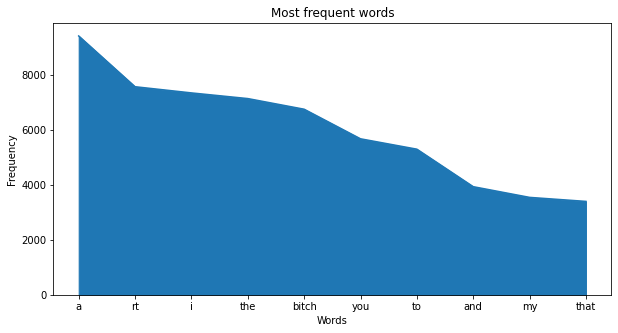

In [9]:
df_uncleaned.plot(kind = "area",
             title = "Most frequent words", 
             legend = False,
             xlabel = "Words",
             ylabel = "Frequency",
             figsize = (10, 5))
plt.xticks(range(0,len(df_uncleaned.index)), df_uncleaned[0])
plt.show()

In [10]:
#tokenizer = Tokenizer(num_words = -1)
#tokenizer.fit_on_texts(df["tweet"])

In [11]:
#word_index = tokenizer.word_index

In [12]:
#print(word_index)

## Remove stopwords

To gain more substantial insight into the data, stopwords such as "i", "a", "at", "the" have to be removed. These words construct the grammatical dependencies of the english language, but do not contain any relevant information to determine hate speech.

## Remove Tags

Twitter tags such as @genericUser do not give further insight for hate speech detection purposes. Thus, they have to be removed.

## Remove Links

Similar to stopwords and Tags, links do not add meaningfull information to the purpose of hate speech --> remove

In [13]:
#Uncomment if nltk stopwords were not downloaded yet
#nltk.download('stopwords')

In [34]:
#Define variable wit henglish stopwords
sw = stopwords.words("english")
twitter_elements = ["rt", "rts", "retweet"]
cleaned_word_list = []


for element in word_counts.most_common():
    #Removes words contained in stopwords
    if element[0] not in sw:
        #Removes words with @ --> remove Tags
        if "@" not in element[0]: 
            #Removes words containing http --> links
            if "http" not in element[0]:
                for tw in twitter_elements:
                    #print(type(element[0]))
                    new_element = element[0]
                    new_element = new_element.replace(tw, "")
                    print(new_element)
                cleaned_word_list.append([new_element, element[1]])


rt
rt
bitch
bitch
bitch
bitches
bitches
bitches
like
like
like
hoes
hoes
hoes
pussy
pussy
pussy
i'm
i'm
i'm
hoe
hoe
hoe
ass
ass
ass
get
get
get
fuck
fuck
fuck
got
got
got
u
u
u
nigga
nigga
nigga
shit
shit
shit
lol
lol
lol
ain't
ain't
ain't
trash
trash
trash
&amp;
&amp;
&amp;
know
know
know
niggas
niggas
niggas
love
love
love
one
one
one
fucking
fucking
fucking
yo
yo
yo
go
go
go
want
want
want
can't
can't
can't
bitch.
bitch.
bitch.
bad
bad
bad
good
good
good
make
make
make
still
still
still
that's
that's
that's
hate
hate
hate
ya
ya
ya
look
look
look
think
think
think
see
see
see
say
say
say
im
im
im
need
need
need
never
never
never
.
.
.
man
man
man
really
really
really
y'all
y'all
y'all
,
,
,
back
back
back
even
even
even
would
would
would
real
real
real
people
people
people
girl
girl
girl
white
white
white
time
time
time
said
said
said
wanna
wanna
wanna
wit
wit
wit
right
right
right
let
let
let
faggot
faggot
faggot
bout
bout
bout
tell
tell
tell
little
little
little
lmao
lmao
lmao
cal

thinkin
thinkin
up!
up!
up!
cook
cook
cook
fam
fam
fam
lowkey
lowkey
lowkey
forever
forever
forever
ever.
ever.
ever.
15
15
15
news
news
news
&#128581;
&#128581;
&#128581;
aka
aka
aka
"the
"the
"the
callin
callin
callin
regular
regular
regular
freak
freak
freak
sense
sense
sense
jk
jk
jk
whipped
whipped
whipped
ring
ring
ring
babe
babe
babe
driving
driving
driving
dogs
dogs
dogs
blocked
blocked
blocked
hahahaha
hahahaha
hahahaha
count
count
count
following
following
following
sloppy
sloppy
sloppy
bone
bone
bone
speaking
speaking
speaking
i&#8217;m
i&#8217;m
i&#8217;m
knock
knock
knock
yellow.
yellow.
yellow.
add
add
add
ignorant
ignorant
ignorant
lunch
lunch
lunch
turning
turning
turning
vote
vote
vote
bill
bill
bill
born
born
born
i'ma
i'ma
i'ma
monday
monday
monday
bf
bf
bf
confused
confused
confused
fighting
fighting
fighting
cats
cats
cats
tells
tells
tells
trick
trick
trick
nose
nose
nose
pissed
pissed
pissed
oomf
oomf
oomf
longer
longer
longer
lol&#8221;
lol&#8221;
lol&#8221;
bob

league
tupac
tupac
tupac
search
search
search
monkey.
monkey.
monkey.
fox
fox
fox
kills
kills
kills
ew
ew
ew
birds,
birds,
birds,
ta
ta
ta
borrow
borrow
borrow
nigga's
nigga's
nigga's
funny.
funny.
funny.
bird,
bird,
bird,
hopes
hopes
hopes
nappy
nappy
nappy
apa
apart
apart
shitting
shitting
shitting
stalking
stalking
stalking
wondering
wondering
wondering
squad
squad
squad
eats
eats
eats
bars
bars
bars
conce
concert
concert
badass
badass
badass
hashtag
hashtag
hashtag
yal
yal
yal
fags.
fags.
fags.
dead.
dead.
dead.
crazy.
crazy.
crazy.
today?
today?
today?
salute
salute
salute
rule
rule
rule
face,
face,
face,
crystal
crystal
crystal
disrespect
disrespect
disrespect
abt
abt
abt
p
p
p
crowd
crowd
crowd
reply
reply
reply
sugar
sugar
sugar
stevie
stevie
stevie
cuff
cuff
cuff
debate
debate
debate
blast
blast
blast
saved
saved
saved
stunt
stunt
stunt
california
california
california
outfit
outfit
outfit
nails
nails
nails
job,
job,
job,
related
related
related
including
including
including
d

ham
dusty
dusty
dusty
dej
dej
dej
scratch
scratch
scratch
today..
today..
today..
aux
aux
aux
fml
fml
fml
&gt;&gt;
&gt;&gt;
&gt;&gt;
cole
cole
cole
w.
w.
w.
lmao&#8221;
lmao&#8221;
lmao&#8221;
minded
minded
minded
bosh
bosh
bosh
ahaha
ahaha
ahaha
az
az
az
queer.
queer.
queer.
innocent
innocent
innocent
dreaming
dreaming
dreaming
amanda
amanda
amanda
ass?
ass?
ass?
that!
that!
that!
us,
us,
us,
tho!
tho!
tho!
stacks
stacks
stacks
35
35
35
i?
i?
i?
&#128056;&#9749;&#65039;
&#128056;&#9749;&#65039;
&#128056;&#9749;&#65039;
jam
jam
jam
textin
textin
textin
accidentally
accidentally
accidentally
bite
bite
bite
5.
5.
5.
clothing
clothing
clothing
jones
jones
jones
diamond
diamond
diamond
ignoring
ignoring
ignoring
vegetables
vegetables
vegetables
clock
clock
clock
valentines
valentines
valentines
trippen
trippen
trippen
depressed
depressed
depressed
#facts
#facts
#facts
sarcastic
sarcastic
sarcastic
trigger
trigger
trigger
figured
figured
figured
comfoable
comfortable
comfortable
&#128541;
&

shit's
#nfl
#nfl
#nfl
garden
garden
garden
here"
here"
here"
handicapped
handicapped
handicapped
scalp
scalp
scalp
catchin
catchin
catchin
"im
"im
"im
bible
bible
bible
mufuckin
mufuckin
mufuckin
god.
god.
god.
rains
rains
rains
spare
spare
spare
rain,
rain,
rain,
#cunt
#cunt
#cunt
embarrassed
embarrassed
embarrassed
remains
remains
remains
ap
ap
ap
shoots
shoots
shoots
#retarded
#retarded
#retarded
#ass
#ass
#ass
slang
slang
slang
downtown
downtown
downtown
kansas
kansas
kansas
host
host
host
convinced
convinced
convinced
#firecashman
#firecashman
#firecashman
pussies,
pussies,
pussies,
#college
#college
#college
#hoosiernation
#hoosiernation
#hoosiernation
hunter
hunter
hunter
dust
dust
dust
gov
gov
gov
troops
troops
troops
handed
handed
handed
soldiers
soldiers
soldiers
tori
tori
tori
#1069thearrow
#1069thearrow
#1069thearrow
#pacers
#pacers
#pacers
breast
breast
breast
andy
andy
andy
cases
cases
cases
virus
virus
virus
snakes
snakes
snakes
stroke
stroke
stroke
extremely
extremely
e

rino
rino
lesbian.
lesbian.
lesbian.
#jesuschrist
#jesuschrist
#jesuschrist
&#128514;&#128514;&#128514;&#8221;
&#128514;&#128514;&#128514;&#8221;
&#128514;&#128514;&#128514;&#8221;
plate.
plate.
plate.
once.
once.
once.
it....
it....
it....
&#128564;&#128564;
&#128564;&#128564;
&#128564;&#128564;
meter
meter
meter
november
november
november
valerie
valerie
valerie
reads
reads
reads
liv
liv
liv
#rebelscience
#rebelscience
#rebelscience
hogging
hogging
hogging
#windturbines
#windturbines
#windturbines
#rome
#rome
#rome
hatred
hatred
hatred
#royals
#royals
#royals
tomorrow's
tomorrow's
tomorrow's
sweep
sweep
sweep
yost
yost
yost
pineapple
pineapple
pineapple
gay?
gay?
gay?
infections
infections
infections
#that
#that
#that
katrina
katrina
katrina
thug.
thug.
thug.
#umightnotgetin
#umightnotgetin
#umightnotgetin
#beerandtacos
#beerandtacos
#beerandtacos
#wethelastonesleft
#wethelastonesleft
#wethelastonesleft
arod
arod
arod
sec
sec
sec
off!
off!
off!
hea.
heart.
heart.
hmm
hmm
hmm
tanks
ta

basic.
basic.
basic.
peace.
peace.
peace.
tons
tons
tons
budget
budget
budget
senator
senator
senator
makem
makem
makem
nina
nina
nina
pays
pays
pays
nervous
nervous
nervous
virgins
virgins
virgins
asl
asl
asl
excitement
excitement
excitement
sir...
sir...
sir...
gooooo
gooooo
gooooo
weaves
weaves
weaves
rappin
rappin
rappin
won,
won,
won,
nigerian
nigerian
nigerian
dean
dean
dean
everyone's
everyone's
everyone's
gatorade
gatorade
gatorade
squinty
squinty
squinty
instagram,
instagram,
instagram,
alone"
alone"
alone"
up!!
up!!
up!!
yalls
yalls
yalls
jackets
jackets
jackets
interviews
interviews
interviews
bytches
bytches
bytches
rumors
rumors
rumors
lube
lube
lube
slippin
slippin
slippin
azalea
azalea
azalea
annoyed
annoyed
annoyed
lifted
lifted
lifted
lost,
lost,
lost,
swings
swings
swings
been.
been.
been.
public.
public.
public.
planned
planned
planned
sleepy
sleepy
sleepy
heated
heated
heated
43
43
43
72
72
72
who&#8217;s
who&#8217;s
who&#8217;s
ont
ont
ont
them?
them?
them?
darkie


lool
lool
lool
&#128540;&#8221;
&#128540;&#8221;
&#128540;&#8221;
feel?
feel?
feel?
obamacare
obamacare
obamacare
tat
tat
tat
&#128524;&#8221;
&#128524;&#8221;
&#128524;&#8221;
u&#8221;
u&#8221;
u&#8221;
ho?
ho?
ho?
gals
gals
gals
vocabulary
vocabulary
vocabulary
&#128037;
&#128037;
&#128037;
"hoe
"hoe
"hoe
buns
buns
buns
joba
joba
joba
nut.
nut.
nut.
worryin
worryin
worryin
meal.
meal.
meal.
colts
colts
colts
badly
badly
badly
.
rt.
rt.
&#10084;
&#10084;
&#10084;
ayyyyy
ayyyyy
ayyyyy
affection
affection
affection
fraud
fraud
fraud
voting
voting
voting
lawyers
lawyers
lawyers
"nigga"
"nigga"
"nigga"
happend
happend
happend
shed
shed
shed
fucking..
fucking..
fucking..
decaf
decaf
decaf
coffee.
coffee.
coffee.
trash."
trash."
trash."
humor
humor
humor
sag
sag
sag
bandz
bandz
bandz
uggs
uggs
uggs
rachet
rachet
rachet
mee...
mee...
mee...
&#1041219;
&#1041219;
&#1041219;
&#1041196;
&#1041196;
&#1041196;
zone'nn
zone'nn
zone'nn
stressful
stressful
stressful
hitters
hitters
hitters
,...
,...

mums
mums
scheming
scheming
scheming
jaime
jaime
jaime
soccer?
soccer?
soccer?
problems.
problems.
problems.
assure
assure
assure
hw
hw
hw
mill
mill
mill
libs
libs
libs
long,
long,
long,
tree.
tree.
tree.
(never
(never
(never
series.
series.
series.
dem?
dem?
dem?
sting
sting
sting
weed.
weed.
weed.
piers
piers
piers
whale
whale
whale
pamaj
pamaj
pamaj
complain.
complain.
complain.
plant
plant
plant
best?
best?
best?
whipping
whipping
whipping
warsaw
warsaw
warsaw
crazy!
crazy!
crazy!
pussy-whipped
pussy-whipped
pussy-whipped
spilt
spilt
spilt
nips!
nips!
nips!
bastards.
bastards.
bastards.
curled
curled
curled
kidding,
kidding,
kidding,
pussies!
pussies!
pussies!
huh.
huh.
huh.
promotion
promotion
promotion
15k
15k
15k
"nigger".
"nigger".
"nigger".
ranch
ranch
ranch
correctly
correctly
correctly
hammer
hammer
hammer
mellie
mellie
mellie
season!
season!
season!
blog
blog
blog
constitution
constitution
constitution
spending
spending
spending
deformed
deformed
deformed
rocky
rocky
rocky


maniac
workin
workin
workin
nelly
nelly
nelly
to..
to..
to..
volunteers
volunteers
volunteers
2011
2011
2011
ever,
ever,
ever,
flats
flats
flats
theft
theft
theft
$500
$500
$500
charges
charges
charges
gentleman
gentleman
gentleman
preacher
preacher
preacher
10$
10$
10$
hormones
hormones
hormones
daily,
daily,
daily,
bigger,
bigger,
bigger,
'these
'these
'these
jays
jays
jays
fuckem
fuckem
fuckem
selfies.
selfies.
selfies.
speculation.
speculation.
speculation.
drafts.
drafts.
drafts.
driving,
driving,
driving,
swerving
swerving
swerving
trusted.
trusted.
trusted.
employees
employees
employees
intellectual
intellectual
intellectual
#faggots&gt;
#faggots&gt;
#faggots&gt;
doing.
doing.
doing.
sailor
sailor
sailor
3,000
3,000
3,000
protected
protected
protected
vip
vip
vip
nelson
nelson
nelson
removes
removes
removes
niqqas
niqqas
niqqas
mo.
mo.
mo.
homies.
homies.
homies.
vote?
vote?
vote?
bobble
bobble
bobble
gitmo
gitmo
gitmo
ships
ships
ships
smelled
smelled
smelled
tfeh
tfeh
tfeh
ode

(-:
(-:
(-:
witchu.
witchu.
witchu.
twats.
twats.
twats.
lungs
lungs
lungs
sadity
sadity
sadity
\\
\\
\\
shallow,
shallow,
shallow,
cha,
cha,
cha,
madonna
madonna
madonna
wesgod
wesgod
wesgod
cousin:
cousin:
cousin:
beans,
beans,
beans,
dat...
dat...
dat...
waahh
waahh
waahh
froze
froze
froze
zoe's
zoe's
zoe's
shaved&#160;pussy
shaved&#160;pussy
shaved&#160;pussy
ioana
ioana
ioana
kleopatra
kleopatra
kleopatra
holocaust
holocaust
holocaust
gap-toothed
gap-toothed
gap-toothed
u!!!
u!!!
u!!!
umbrella
umbrella
umbrella
levitating
levitating
levitating
wackson
wackson
wackson
sheriff
sheriff
sheriff
debt
debt
debt
raaa
raaa
raaa
hitman
hitman
hitman
yada
yada
yada
lindsay
lindsay
lindsay
lohan
lohan
lohan
cold...tyga
cold...tyga
cold...tyga
place!!
place!!
place!!
dawg!!!!
dawg!!!!
dawg!!!!
!!!!!!!!!
!!!!!!!!!
!!!!!!!!!
!!!!!!!!!!!!!
!!!!!!!!!!!!!
!!!!!!!!!!!!!
&#57361;
&#57361;
&#57361;
me..claim
me..claim
me..claim
on!"
on!"
on!"
girls!!&#8221;
girls!!&#8221;
girls!!&#8221;
:hobbies
:hob

#drunk
#drunk
#trashed
#trashed
#trashed
#wasted
#wasted
#wasted
draught
draught
draught
#jesuschrist&gt;
#jesuschrist&gt;
#jesuschrist&gt;
hello!!!!!!!!!!!!!!!!!!!!!!!!!
hello!!!!!!!!!!!!!!!!!!!!!!!!!
hello!!!!!!!!!!!!!!!!!!!!!!!!!
#pharaoh's
#pharaoh's
#pharaoh's
pockets&gt;
pockets&gt;
pockets&gt;
merely
merely
merely
#scientific
#scientific
#scientific
indicator
indicator
indicator
wrong&gt;
wrong&gt;
wrong&gt;
"unique
"unique
"unique
indiviuals"
indiviuals"
indiviuals"
#cancer&gt;
#cancer&gt;
#cancer&gt;
#firefighter
#firefighter
#firefighter
balanced.
balanced.
balanced.
liars.
liars.
liars.
#surf
#surf
#surf
#bright
#bright
#bright
#happysunday
#happysunday
#happysunday
#peace
#peace
#peace
wishing&#8230;
wishing&#8230;
wishing&#8230;
#honeybadger
#honeybadger
#honeybadger
#hoosier
#hoosier
#hoosier
zeller
zeller
zeller
nominating
nominating
nominating
#illneverunderstandwhy
#illneverunderstandwhy
#illneverunderstandwhy
shitbag
shitbag
shitbag
#twentysix
#twentysix
#twentysix
pa

83
83
83
basketball.
basketball.
basketball.
&#127936;&#128060;&#8221;
&#127936;&#128060;&#8221;
&#127936;&#128060;&#8221;
&#128514;&#8221;real
&#128514;&#8221;real
&#128514;&#8221;real
yanno
yanno
yanno
&#128519;&#8221;
&#128519;&#8221;
&#128519;&#8221;
wrong...&#8221;
wrong...&#8221;
wrong...&#8221;
sydneys
sydneys
sydneys
favorite&#8221;
favorite&#8221;
favorite&#8221;
same&#8221;
same&#8221;
same&#8221;
7.
7.
7.
fucn
fucn
fucn
ex?&#8221;na
ex?&#8221;na
ex?&#8221;na
binging
binging
binging
atl!
atl!
atl!
#turnup!&#8221;
#turnup!&#8221;
#turnup!&#8221;
&#128513;&#128513;&#128175;
&#128513;&#128513;&#128175;
&#128513;&#128513;&#128175;
bruh..&#8221;
bruh..&#8221;
bruh..&#8221;
level&#8221;
level&#8221;
level&#8221;
&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;
&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;
&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#

depp's
depp's
depp's
factory?
factory?
factory?
kinfolk
kinfolk
kinfolk
baboo
baboo
baboo
ho?!?!
ho?!?!
ho?!?!
semi
semi
semi
plaquemine
plaquemine
plaquemine
lydia
lydia
lydia
fwm!"
fwm!"
fwm!"
kannon
kannon
kannon
maas
maas
maas
sharkette
sharkette
sharkette
rii?
rii?
rii?
staing?
starting?
starting?
chink?
chink?
chink?
penske
penske
penske
nascar.
nascar.
nascar.
#wouldmakealottasense
#wouldmakealottasense
#wouldmakealottasense
soto
soto
soto
karass,
karass,
karass,
chaves.
chaves.
chaves.
insomnia
insomnia
insomnia
waco
waco
waco
coley
coley
coley
whammmmed
whammmmed
whammmmed
swervee
swervee
swervee
sahara
sahara
sahara
piece..
piece..
piece..
dammed
dammed
dammed
#whitetears
#whitetears
#whitetears
yellow!
yellow!
yellow!
#lessonoftheday
#lessonoftheday
#lessonoftheday
*hoes
*hoes
*hoes
hard!
hard!
hard!
offensive,
offensive,
offensive,
franch
franch
franch
heffa.
heffa.
heffa.
offs
offs
offs
fever.
fever.
fever.
-___-
-___-
-___-
4..
4..
4..
&#128514;&#128514;&#128557;&#128527;

!&#128077;
!&#128077;
brownies!!
brownies!!
brownies!!
anyday
anyday
anyday
anything&#128111;&#128539;&#128109;
anything&#128111;&#128539;&#128109;
anything&#128111;&#128539;&#128109;
302
302
302
tranny??
tranny??
tranny??
noodle
noodle
noodle
countryass
countryass
countryass
niggers*
niggers*
niggers*
messier/more
messier/more
messier/more
dangerous/more
dangerous/more
dangerous/more
environmentally-unfriendly
environmentally-unfriendly
environmentally-unfriendly
spouts.
spouts.
spouts.
naah
naah
naah
33
33
33
watch...lol
watch...lol
watch...lol
animated
animated
animated
repping
repping
repping
oleander
oleander
oleander
ron,
ron,
ron,
korina
korina
korina
craycray.
craycray.
craycray.
a,special
a,special
a,special
keyboard
keyboard
keyboard
overbites"
overbites"
overbites"
intimidator"
intimidator"
intimidator"
...republican
...republican
...republican
#pinoccio
#pinoccio
#pinoccio
realm!
realm!
realm!
fair!
fair!
fair!
niggah!!!
niggah!!!
niggah!!!
outs
outs
outs
edict
edict
edict


yasss!
yasss!
anti-racist
anti-racist
anti-racist
anti-white.
anti-white.
anti-white.
anti-zionist
anti-zionist
anti-zionist
antisemite.
antisemite.
antisemite.
gimmi
gimmi
gimmi
numba&#128299;
numba&#128299;
numba&#128299;
red&amp;yellow
red&amp;yellow
red&amp;yellow
balkamania
balkamania
balkamania
page?
page?
page?
oh?
oh?
oh?
wantttt
wantttt
wantttt
(dmx
(dmx
(dmx
voice)&#128553;&#128553;&#128553;
voice)&#128553;&#128553;&#128553;
voice)&#128553;&#128553;&#128553;
cracker..
cracker..
cracker..
boy..
boy..
boy..
blah...
blah...
blah...
&#128680;&#128680;&#128680;&#128680;bad
&#128680;&#128680;&#128680;&#128680;bad
&#128680;&#128680;&#128680;&#128680;bad
baylee
baylee
baylee
ann,
ann,
ann,
pud,
pud,
pud,
fester,
fester,
fester,
chainsaws,
chainsaws,
chainsaws,
team?!
team?!
team?!
punishermax!:-d
punishermax!:-d
punishermax!:-d
wheelin
wheelin
wheelin
ccs.
ccs.
ccs.
scared.
scared.
scared.
idk...
idk...
idk...
cab
cab
cab
tractor
tractor
tractor
firm
firm
firm
rickety
rickety
rickety

gosh
gosh
gosh
cute?!
cute?!
cute?!
iran.
iran.
iran.
either....birds
either....birds
either....birds
fam,
fam,
fam,
blind?
blind?
blind?
companies
companies
companies
$40+
$40+
$40+
theatre
theatre
theatre
#annabelle
#annabelle
#annabelle
recorded
recorded
recorded
spiraling
spiraling
spiraling
downward
downward
downward
raglyscrag.
raglyscrag.
raglyscrag.
places.
places.
places.
antville,
antville,
antville,
honkey?
honkey?
honkey?
weve
weve
weve
yankee?
yankee?
yankee?
knodell
knodell
knodell
vandyke
vandyke
vandyke
chrisis
chrisis
chrisis
jones.
jones.
jones.
botta
botta
botta
conversatin
conversatin
conversatin
nig..
nig..
nig..
ok..
ok..
ok..
leprechaun-looking
leprechaun-looking
leprechaun-looking
handyman
handyman
handyman
cabinet
cabinet
cabinet
bidness
bidness
bidness
heyy
heyy
heyy
hiden
hiden
hiden
askd
askd
askd
choppa
choppa
choppa
chops
chops
chops
cried.
cried.
cried.
gwenyth?
gwenyth?
gwenyth?
11k
11k
11k
help!
help!
help!
muny
muny
muny
#disfigure
#disfigure
#disfigur

apolonia
apolonia
imperial,
imperial,
imperial,
misspells
misspells
misspells
"phalarope"
"phalarope"
"phalarope"
resembles
resembles
resembles
sandpiper.
sandpiper.
sandpiper.
dreaded
dreaded
dreaded
schwa!
schwa!
schwa!
#diettime
#diettime
#diettime
pfft.
pfft.
pfft.
nitro
nitro
nitro
m4
m4
m4
collossal
collossal
collossal
apparently,
apparently,
apparently,
poker.
poker.
poker.
appropriately
appropriately
appropriately
drafts"?
drafts"?
drafts"?
pick,
pick,
pick,
"chaos"?
"chaos"?
"chaos"?
#showofhands
#showofhands
#showofhands
glued
glued
glued
auro
arturo
arturo
chanice
chanice
chanice
belaire.
belaire.
belaire.
$30
$30
$30
left..bitch
left..bitch
left..bitch
wassup.
wassup.
wassup.
dependent
dependent
dependent
hayseed
hayseed
hayseed
yaselves
yaselves
yaselves
percy
percy
percy
harvin
harvin
harvin
sound&#8230;
sound&#8230;
sound&#8230;
muthafuckas
muthafuckas
muthafuckas
hack
hack
hack
bolton
bolton
bolton
sweet....
sweet....
sweet....
&#128528;&#128528;.
&#128528;&#128528;.
&#

congo!
congo!
motivate
motivate
motivate
sleep&#128564;
sleep&#128564;
sleep&#128564;
pizza...
pizza...
pizza...
munchies,
munchies,
munchies,
gym...
gym...
gym...
egypt?
egypt?
egypt?
things?
things?
things?
respectors
respectors
respectors
bitch!?
bitch!?
bitch!?
saved"
saved"
saved"
&#9996;&#65039;&#128139;
&#9996;&#65039;&#128139;
&#9996;&#65039;&#128139;
#cantstanducunt
#cantstanducunt
#cantstanducunt
a.stupid
a.stupid
a.stupid
elizbian
elizbian
elizbian
turds
turds
turds
emd
emd
emd
endless
endless
endless
men:
men:
men:
positive(s)
positive(s)
positive(s)
possibles
possibles
possibles
#dc
#dc
#dc
#640!
#640!
#640!
#singlelife
#singlelife
#singlelife
#bed
#bed
#bed
#teddybear
#teddybear
#teddybear
eccentricity
eccentricity
eccentricity
americarna.
americarna.
americarna.
appearances
appearances
appearances
watched.
watched.
watched.
nahh..
nahh..
nahh..
shiver.
shiver.
shiver.
flawging
flawging
flawging
scrapy
scrapy
scrapy
errrnigga
errrnigga
errrnigga
esp
esp
esp
souf
souf
souf

married?
g-eazy
g-eazy
g-eazy
quid
quid
quid
shit&amp;
shit&amp;
shit&amp;
shit...u
shit...u
shit...u
around...
around...
around...
nuttin.
nuttin.
nuttin.
subhuman.
subhuman.
subhuman.
&#128109;&#128107;&#128108;
&#128109;&#128107;&#128108;
&#128109;&#128107;&#128108;
&#128073;,
&#128073;,
&#128073;,
&#128109;&#128109;.
&#128109;&#128109;.
&#128109;&#128109;.
frenemies
frenemies
frenemies
#geoffhatespuppies
#geoffhatespuppies
#geoffhatespuppies
lacs!
lacs!
lacs!
takis
takis
takis
yeent
yeent
yeent
"fish"
"fish"
"fish"
#dreams
#dreams
#dreams
luvv...
luvv...
luvv...
bitch?&#8221;
bitch?&#8221;
bitch?&#8221;
#trenttruce
#trenttruce
#trenttruce
patrickos
patrickos
patrickos
slick&#128530;
slick&#128530;
slick&#128530;
bitches/niggas.
bitches/niggas.
bitches/niggas.
bleed
bleed
bleed
&#10071;&#65039;&#10069;&#8252;&#65039;&#10069;&#10069;
&#10071;&#65039;&#10069;&#8252;&#65039;&#10069;&#10069;
&#10071;&#65039;&#10069;&#8252;&#65039;&#10069;&#10069;
tl"?????
tl"?????
tl"?????
with..it
with

#unbothered
#unbothered
#threatenwho
#threatenwho
#threatenwho
treating.
treating.
treating.
sometimes&#128553;&#128553;
sometimes&#128553;&#128553;
sometimes&#128553;&#128553;
roethlisberger
roethlisberger
roethlisberger
expunged
expunged
expunged
&#8986;&#128130;
&#8986;&#128130;
&#8986;&#128130;
justified
justified
justified
disturbing
disturbing
disturbing
lifetime....
lifetime....
lifetime....
smokin.
smokin.
smokin.
thru.
thru.
thru.
funccy
funccy
funccy
!&#128074;&#128527;&#128064;
!&#128074;&#128527;&#128064;
!&#128074;&#128527;&#128064;
dip...
dip...
dip...
acre
acre
acre
zoning
zoning
zoning
0300
0300
0300
resolved
resolved
resolved
movie,
movie,
movie,
star...
star...
star...
extras...
extras...
extras...
chick&#187;
chick&#187;
chick&#187;
4:18
4:18
4:18
100,000
100,000
100,000
presentation
presentation
presentation
chipotle,
chipotle,
chipotle,
#tease
#tease
#tease
#feedme
#feedme
#feedme
tearing
tearing
tearing
perry.
perry.
perry.
bitches.dey
bitches.dey
bitches.dey
did.

lost..stop
lost..stop
tagging
tagging
tagging
gallery
gallery
gallery
blog:
blog:
blog:
enterprise
enterprise
enterprise
ralph
ralph
ralph
fabric
fabric
fabric
8pm
8pm
8pm
tranny.....go
tranny.....go
tranny.....go
self!
self!
self!
arguement
arguement
arguement
trash".her
trash".her
trash".her
argurment
argurment
argurment
paid"....
paid"....
paid"....
credentials?
credentials?
credentials?
lexy.
lexy.
lexy.
winter.
winter.
winter.
rwd
rwd
rwd
flaw.
flaw.
flaw.
little!
little!
little!
much!
much!
much!
prevented
prevented
prevented
&#128557;&#128514;&#128557;
&#128557;&#128514;&#128557;
&#128557;&#128514;&#128557;
monkey....
monkey....
monkey....
tweet!
tweet!
tweet!
&#128527;&#128530;
&#128527;&#128530;
&#128527;&#128530;
06
06
06
pmo
pmo
pmo
faction
faction
faction
piece,
piece,
piece,
islands.
islands.
islands.
bre
bre
bre
free'd
free'd
free'd
&#128530;&#9995;&#128514;
&#128530;&#9995;&#128514;
&#128530;&#9995;&#128514;
educated,
educated,
educated,
payments
payments
payments
multi-

militia,
militia,
militia,
squad,
squad,
squad,
sack,
sack,
sack,
fc,
fc,
fc,
pregame
pregame
pregame
speeches
speeches
speeches
weepy
weepy
weepy
fog
fog
fog
soar;
soar;
soar;
feel&#8230;
feel&#8230;
feel&#8230;
daft
daft
daft
researched
researched
researched
aicle...bound
article...bound
article...bound
elicit
elicit
elicit
cakes,
cakes,
cakes,
#extralife
#rtextralife
#rtextralife
fec
fec
fec
guards
guards
guards
drudge,
drudge,
drudge,
#wiunion
#wiunion
#wiunion
else,"
else,"
else,"
babe/baby.
babe/baby.
babe/baby.
15?"
15?"
15?"
ten,
ten,
ten,
nobody's
nobody's
nobody's
pregnant.&#8230;
pregnant.&#8230;
pregnant.&#8230;
clocks
clocks
clocks
nothin,
nothin,
nothin,
munnaaaa
munnaaaa
munnaaaa
&#128555;&#128555;&#8221;finding
&#128555;&#128555;&#8221;finding
&#128555;&#128555;&#8221;finding
&#128526;&#128526;&#128514;&#128514;&#128514;&#128514;
&#128526;&#128526;&#128514;&#128514;&#128514;&#128514;
&#128526;&#128526;&#128514;&#128514;&#128514;&#128514;
returns
returns
returns
owner:
o

pleit
jaren
jaren
jaren
voor.
voor.
voor.
bevreesd
bevreesd
bevreesd
ooit
ooit
ooit
da'k
da'k
da'k
wer&#8230;
wer&#8230;
wer&#8230;
*pours
*pours
*pours
dorks
dorks
dorks
bitch-magnets.
bitch-magnets.
bitch-magnets.
crazy".
crazy".
crazy".
"cock
"cock
"cock
block"
block"
block"
"clam
"clam
"clam
jam."
jam."
jam."
shadows,
shadows,
shadows,
moments,
moments,
moments,
darkest
darkest
darkest
gallons
gallons
gallons
"albino"
"albino"
"albino"
wild.
wild.
wild.
two-man
two-man
two-man
doo-wop
doo-wop
doo-wop
youtube!
youtube!
youtube!
#fallontonight
#fallontonight
#fallontonight
bill,
bill,
bill,
betta!
betta!
betta!
love!
love!
love!
faggit,
faggit,
faggit,
uniforms,
uniforms,
uniforms,
lock&#8230;
lock&#8230;
lock&#8230;
thugs.
thugs.
thugs.
beta
beta
beta
dense
dense
dense
"reg"
"reg"
"reg"
unfollows
unfollows
unfollows
cheerleader.
cheerleader.
cheerleader.
countdo&#8230;
countdo&#8230;
countdo&#8230;
nip,
nip,
nip,
booze
booze
booze
inadequacy
inadequacy
inadequacy
out&#8230;
out&#823

slaughters
slaughters
slaughters
alive,
alive,
alive,
2escape..
2escape..
2escape..
jihadi-in-chief
jihadi-in-chief
jihadi-in-chief
urges
urges
urges
restraint
restraint
restraint
butchers&#8252;&#65039;apparently,
butchers&#8252;&#65039;apparently,
butchers&#8252;&#65039;apparently,
isis...we
isis...we
isis...we
hu&#8230;
hurt&#8230;
hurt&#8230;
&#128584;&#128586;
&#128584;&#128586;
&#128584;&#128586;
nimbus
nimbus
nimbus
heaed.
hearted.
hearted.
mexicans.
mexicans.
mexicans.
business...
business...
business...
ratha
ratha
ratha
fellas,
fellas,
fellas,
what..
what..
what..
bdubs
bdubs
bdubs
n*gga
n*gga
n*gga
leave.
leave.
leave.
#lhhatlreunion/he
#lhhatlreunion/he
#lhhatlreunion/he
player!he
player!he
player!he
bird!!!!!!
bird!!!!!!
bird!!!!!!
staple
staple
staple
forehead,
forehead,
forehead,
&#8252;&#65039;
&#8252;&#65039;
&#8252;&#65039;
gz's
gz's
gz's
prosecution
prosecution
prosecution
constantly?
constantly?
constantly?
&#128514;&#128514;&#128514;&#128557;&#9996;&#65039;
&#12851

chain..."
chain..."
chain..."
hoe..."
hoe..."
hoe..."
chai&#8230;
chai&#8230;
chai&#8230;
#farrakhan
#farrakhan
#farrakhan
#thetime
#thetime
#thetime
trash-talking
trash-talking
trash-talking
athlete
athlete
athlete
congressman:
congressman:
congressman:
"thug,"
"thug,"
"thug,"
worst.
worst.
worst.
tule;
turtle;
turtle;
simms
simms
simms
silencer
silencer
silencer
.30
.30
.30
ale&#128680;
alert&#128680;
alert&#128680;
bans
bans
bans
"bossy"
"bossy"
"bossy"
makeup..
makeup..
makeup..
ultimately
ultimately
ultimately
ex,
ex,
ex,
douchetard
douchetard
douchetard
butterball.
butterball.
butterball.
sues
sues
sues
back&#8221;lol
back&#8221;lol
back&#8221;lol
pe&#8230;
pe&#8230;
pe&#8230;
mega-carrot
mega-carrot
mega-carrot
+pics!!!
+pics!!!
+pics!!!
gouged
gouged
gouged
harmless
harmless
harmless
fetus
fetus
fetus
#instagram
#instagram
#instagram
r&#233;sum&#233;
r&#233;sum&#233;
r&#233;sum&#233;
dude'
dude'
dude'
napkin
napkin
napkin
kanye"
kanye"
kanye"
snails
snails
snails
pace
pace
pace

cuains
curtains
curtains
tractors
tractors
tractors
loyalty&#8230;
loyalty&#8230;
loyalty&#8230;
zulema
zulema
zulema
birds&#8221;---get
birds&#8221;---get
birds&#8221;---get
fukkk
fukkk
fukkk
backs&#8221;
backs&#8221;
backs&#8221;
kesha
kesha
kesha
&#10084;&#128076;
&#10084;&#128076;
&#10084;&#128076;
georgia
georgia
georgia
tennessee?
tennessee?
tennessee?
on....i
on....i
on....i
dumbbbb&#8221;
dumbbbb&#8221;
dumbbbb&#8221;
trev.
trev.
trev.
&#128586;&#128566;
&#128586;&#128566;
&#128586;&#128566;
1932
1932
1932
assassinate
assassinate
assassinate
#pleaseoptionthistweetnow
#pleaseoptionthistweetnow
#pleaseoptionthistweetnow
sweating&#8221;
sweating&#8221;
sweating&#8221;
q&#8230;
q&#8230;
q&#8230;
hannah
hannah
hannah
bitch&#8221;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;
bitch&#8221;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#

*claps*"
*claps*"
*claps*"
"youre
"youre
"youre
ride."
ride."
ride."
fountains
fountains
fountains
tbt:
tbt:
tbt:
brownies&#8230;
brownies&#8230;
brownies&#8230;
"&#8221;&#128514;
"&#8221;&#128514;
"&#8221;&#128514;
canker
canker
canker
sores
sores
sores
hinder
hinder
hinder
"hehe"
"hehe"
"hehe"
place"
place"
place"
you...hoes
you...hoes
you...hoes
animals...(well
animals...(well
animals...(well
some)
some)
some)
lana......it
lana......it
lana......it
nuttin'
nuttin'
nuttin'
#giantduck
#giantduck
#giantduck
#pittsburghduck
#pittsburghduck
#pittsburghduck
#livestream
#livestream
#livestream
#wpxi
#wpxi
#wpxi
#nofliter
#nofliter
#nofliter
duckburgh
duckburgh
duckburgh
provide.
provide.
provide.
-jacey
-jacey
-jacey
(the
(the
(the
doe)
doe)
doe)
#bff
#bff
#bff
#baby
#baby
#baby
speedwagon
speedwagon
speedwagon
#fatbands
#fatbands
#fatbands
ou
ou
ou
reconciliation.
reconciliation.
reconciliation.
idea!
idea!
idea!
#xfactor
#xfactor
#xfactor
auditions
auditions
auditions
dublin,
dublin,
dub

sunset,
your,
your,
your,
#tnt
#tnt
#tnt
#acdc
#acdc
#acdc
cluuuuub
cluuuuub
cluuuuub
guns!
guns!
guns!
#tron
#tron
#tron
bitches.........
bitches.........
bitches.........
see&gt;
see&gt;
see&gt;
line&gt;
line&gt;
line&gt;
creation.
creation.
creation.
#overbreeding&gt;
#overbreeding&gt;
#overbreeding&gt;
#period&gt;
#period&gt;
#period&gt;
emotional.
emotional.
emotional.
dignity.
dignity.
dignity.
swill
swill
swill
concourse,
concourse,
concourse,
mistaken...
mistaken...
mistaken...
meijer
meijer
meijer
#gooddeed
#gooddeed
#gooddeed
came.
came.
came.
#natural
#natural
#natural
#born
#born
#born
#canadian
#canadian
#canadian
emojii
emojii
emojii
sendin
sendin
sendin
voem
voem
voem
testing/drills
testing/drills
testing/drills
here;
here;
here;
tonk(s)?
tonk(s)?
tonk(s)?
question:
question:
question:
bumpin?
bumpin?
bumpin?
'thriller'
'thriller'
'thriller'
#bookgeek
#bookgeek
#bookgeek
n-words
n-words
n-words
sessy's
sessy's
sessy's
homie.
homie.
homie.
sewing
sewing
sewing
presentable

murica,
murica,
fraudulent
fraudulent
fraudulent
puts&#8230;
puts&#8230;
puts&#8230;
sped
sped
sped
o6
o6
o6
invoke
invoke
invoke
3/5
3/5
3/5
cleef
cleef
cleef
arples
arples
arples
bap,
bap,
bap,
clack
clack
clack
earlier,now
earlier,now
earlier,now
sparkling
sparkling
sparkling
gmfu.
gmfu.
gmfu.
coding
coding
coding
cankles
cankles
cankles
up.and
up.and
up.and
her....bitch
her....bitch
her....bitch
sagg
sagg
sagg
&#128184;&#128184;&#128184;
&#128184;&#128184;&#128184;
&#128184;&#128184;&#128184;
backed
backed
backed
twice..
twice..
twice..
&#128299;&#128298;&#128074;
&#128299;&#128298;&#128074;
&#128299;&#128298;&#128074;
toothbrush.
toothbrush.
toothbrush.
"surprise".
"surprise".
"surprise".
fucc.
fucc.
fucc.
pencils
pencils
pencils
sharpened
sharpened
sharpened
sharpen
sharpen
sharpen
chair...
chair...
chair...
laughed..
laughed..
laughed..
laughed.
laughed.
laughed.
forehead.
forehead.
forehead.
hairline.
hairline.
hairline.
approved
approved
approved
&#128530;i
&#128530;i
&#128530

"clutch"
"clutch"
#callemlikeiseeem
#callemlikeiseeem
#callemlikeiseeem
jiggaboo...!
jiggaboo...!
jiggaboo...!
arguin
arguin
arguin
slutttt
slutttt
slutttt
&#128514;&#128514;&#128514;&#128128;&#128128;&#128074;
&#128514;&#128514;&#128514;&#128128;&#128128;&#128074;
&#128514;&#128514;&#128514;&#128128;&#128128;&#128074;
clean&#128514;
clean&#128514;
clean&#128514;
life..!
life..!
life..!
spoilt
spoilt
spoilt
#ohwell
#ohwell
#ohwell
was?!!
was?!!
was?!!
line!
line!
line!
erything
erything
erything
bitches/ho's
bitches/ho's
bitches/ho's
thief
thief
thief
attract..
attract..
attract..
having.
having.
having.
t...
t...
t...
bess,
bess,
bess,
yaself.
yaself.
yaself.
bra.
bra.
bra.
doobie
doobie
doobie
tranny"
tranny"
tranny"
...?
...?
...?
hahahahahahahahahahaha
hahahahahahahahahahaha
hahahahahahahahahahaha
free!
free!
free!
estupid
estupid
estupid
dream?
dream?
dream?
pharaoh.
pharaoh.
pharaoh.
sarcophagus
sarcophagus
sarcophagus
staring.
staring.
staring.
lmfaaoo
lmfaaoo
lmfaaoo
eskimo
esk

mimosas
ago?
ago?
ago?
fins
fins
fins
finnegan?
finnegan?
finnegan?
ceified
certified
certified
tho&#8230;&#8230;
tho&#8230;&#8230;
tho&#8230;&#8230;
pictures?
pictures?
pictures?
movies?
movies?
movies?
13yr
13yr
13yr
brewers
brewers
brewers
season,,,,
season,,,,
season,,,,
booshie
booshie
booshie
velcor
velcor
velcor
straps,
straps,
straps,
striped
striped
striped
tshi
tshirt
tshirt
shocks
shocks
shocks
all...
all...
all...
&#11088;&#65039;
&#11088;&#65039;
&#11088;&#65039;
"great
"great
"great
(5)
(5)
(5)
(7)
(7)
(7)
5!
5!
5!
friday....
friday....
friday....
wonderade
wondertrade
wondertrade
wobbuffet
wobbuffet
wobbuffet
bitch?????
bitch?????
bitch?????
punched.
punched.
punched.
wow....
wow....
wow....
missy?
missy?
missy?
hea.....
hea.....
hea.....
x_x
x_x
x_x
keys.
keys.
keys.
bun..
bun..
bun..
schemes
schemes
schemes
jay???
jay???
jay???
cups.
cups.
cups.
swur
swur
swur
layouts
layouts
layouts
yaya
yaya
yaya
ho..
ho..
ho..
shapely
shapely
shapely
eurotrash
eurotrash
eurotrash
ma

In [37]:
test_string = "rt für test"
for tw in twitter_elements:
    result = test_string.replace(tw, "")
    
print(test_string)

AttributeError: 'str' object has no attribute 'to_string'

In [27]:
for element in cleaned_word_list:
    print(element)
    if "http" in element[0]:
        print(element)

['rt', 7567]
['bitch', 6749]
['bitches', 2677]
['like', 2674]
['hoes', 1977]
['pussy', 1731]
["i'm", 1552]
['hoe', 1483]
['ass', 1472]
['get', 1413]
['fuck', 1311]
['got', 1275]
['u', 1236]
['nigga', 1047]
['shit', 1046]
['lol', 919]
["ain't", 898]
['trash', 859]
['&amp;', 835]
['know', 767]
['niggas', 705]
['love', 667]
['one', 640]
['fucking', 617]
['yo', 580]
['go', 571]
['want', 562]
["can't", 558]
['bitch.', 548]
['bad', 514]
['good', 481]
['make', 475]
['still', 474]
["that's", 461]
['hate', 460]
['ya', 458]
['look', 453]
['think', 452]
['see', 451]
['say', 451]
['im', 450]
['need', 446]
['never', 436]
['.', 409]
['man', 403]
['really', 403]
["y'all", 395]
[',', 385]
['back', 383]
['even', 381]
['would', 369]
['real', 369]
['people', 367]
['girl', 366]
['white', 361]
['time', 361]
['said', 356]
['wanna', 340]
['wit', 340]
['right', 337]
['let', 334]
['faggot', 331]
['bout', 327]
['tell', 317]
['little', 316]
['lmao', 313]
['call', 310]
['gotta', 309]
['da', 301]
['stop', 299]
['&

['be,', 5]
['studying', 5]
['homecoming', 5]
['circles', 5]
['true.', 5]
['ahh', 5]
['it&#8221;', 5]
['alotta', 5]
['pro', 5]
['brah', 5]
['howard', 5]
['marcus', 5]
["you's", 5]
['polo', 5]
['to"', 5]
['sounded', 5]
['slim', 5]
['?&#8221;', 5]
['splash', 5]
['letter', 5]
['spongebob', 5]
['nosey', 5]
['coolest', 5]
['award', 5]
['fckn', 5]
['classes', 5]
['on?', 5]
['bunny', 5]
['officer', 5]
['room.', 5]
['af.', 5]
['weezy', 5]
['community', 5]
['dee', 5]
['fag,', 5]
['peep', 5]
['nicer', 5]
['ahhh', 5]
['wonderful', 5]
['greg', 5]
['job.', 5]
['puff', 5]
['manners', 5]
['pineapples', 5]
['faggot"', 5]
['epic', 5]
["y'all.", 5]
['divorced', 5]
['&#128589;', 5]
['rico', 5]
['trusting', 5]
['nooo', 5]
['undercover', 5]
['nothing,', 5]
['handsome', 5]
['highest', 5]
['chuck', 5]
['fest', 5]
['punched', 5]
['politics', 5]
['doctors', 5]
['everywhere.', 5]
['benz', 5]
['nikes', 5]
['&#9733;718-622-0221', 5]
['!&#9733;', 5]
['&#1041204;', 5]
['alsina', 5]
['me....', 5]
['&#1041204;&#104120

['trainers', 2]
['trainer', 2]
['yasss"', 2]
['workout.', 2]
['burrito', 2]
['boiling', 2]
['perpetually', 2]
['want"', 2]
['awww', 2]
['&#128034;', 2]
['change!', 2]
['whores!', 2]
['partynextdoor', 2]
['bitches."', 2]
['"chinese', 2]
['&#128514;&#128514;&#128553;&#128553;', 2]
['loyal?"', 2]
['see...', 2]
['tight,', 2]
['"dumb', 2]
['hungry"', 2]
['ascii', 2]
['tubes', 2]
['bear"', 2]
['"girls', 2]
['dated,', 2]
['yo,', 2]
['&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;', 2]
['woman...', 2]
['&#128553;"', 2]
['"her', 2]
['hoe,her', 2]
['afghanistan', 2]
['em..', 2]
['doing,', 2]
['hilarious!', 2]
['thrill', 2]
['edgar', 2]
['forever"', 2]
['sister,', 2]
['stewie', 2]
['married,', 2]
["what'd", 2]
['dizzy', 2]
['unique', 2]
['phrases', 2]
['relative', 2]
['younger.', 2]
['downloading', 2]
['it!"', 2]
['"ibs"', 2]
['irritable', 2]
['high"', 2]
['waving', 2]
['naive', 2]
['brick', 2]
['mama."', 2]
['penguins', 2]
['"let\'s', 2]
['ahoy', 2]
['but...', 

['suffer', 2]
['sucha', 2]
['offseason', 2]
['money?', 2]
['good!"', 2]
['woah', 2]
['love?&#128566;&#128514;&#128514;&#128557;&#128557;', 2]
['cough', 2]
['envy', 2]
['fisher', 2]
['karma,', 2]
['&#128553;&#128530;', 2]
['egg.', 2]
['blink', 2]
['#priceless', 2]
['pronounce', 2]
['eggo', 2]
['leggo', 2]
['eggo.', 2]
['&#128564;&#128564;&#128564;&#128564;', 2]
['in:', 2]
['score.', 2]
['bizarre', 2]
['yds', 2]
['bmth', 2]
['adtr', 2]
['ptv', 2]
['ymas', 2]
['sws', 2]
['mcr', 2]
['bvb', 2]
['gd', 2]
['#changethename', 2]
['#httr', 2]
['manages', 2]
['inspirational', 2]
['#ny', 2]
['#ohio', 2]
['rt:', 2]
['emotions,', 2]
['#seahawks', 2]
['39', 2]
['grabbing', 2]
['eddy', 2]
['spotted', 2]
['durag', 2]
['seth', 2]
['&#8220;why', 2]
['stroking', 2]
['&#128064;&#128514;&#128514;', 2]
['&#128514;&#128514;&#128175;', 2]
['booty,', 2]
['#gobrowns', 2]
['dick..', 2]
['&#128514;&#128079;', 2]
['tier', 2]
['talk...', 2]
["'ouija'", 2]
['stupider', 2]
['bouncing', 2]
['supa', 2]
['today:', 2]
['s

['good:', 1]
['send-off', 1]
['yet,', 1]
["'damn", 1]
["whitey!'", 1]
["'newest", 1]
["privilege'", 1]
["'eff", 1]
['cripple&#8217;:', 1]
["davis'", 1]
['[video]', 1]
["'every", 1]
['$3,000', 1]
["it'", 1]
["'forget", 1]
["salute,'", 1]
["'bad", 1]
["war'", 1]
['(during', 1]
['cairo', 1]
['ii),', 1]
["'pockistan,'", 1]
['morale.', 1]
['king!', 1]
['abc', 1]
["'it's", 1]
['pumpkin,', 1]
["brown,'", 1]
["'views", 1]
['while...brace', 1]
['2ur', 1]
['but."', 1]
['eloquent', 1]
['(u-turns', 1]
['&#161;no', 1]
['aceptar', 1]
['este', 1]
['luz', 1]
['rojo!', 1]
['(&#9835;', 1]
['bilingual', 1]
['&#9835;)', 1]
["(con't)", 1]
['stickers', 1]
['nametags', 1]
['indicate', 1]
['preferred', 1]
['pronouns.', 1]
['(looks', 1]
['oomf)', 1]
['&#8220;made', 1]
['china&#8221;', 1]
['pins', 1]
['*bows', 1]
['down*', 1]
['bitchmaster', 1]
['backflip*', 1]
['thissssssss!!!', 1]
['*gigantic', 1]
['chubbs', 1]
['earl.', 1]
['*nicolas', 1]
['unrolls', 1]
['scroll*', 1]
['*searches', 1]
['nearest', 1]
['box*',

['grumblings', 1]
['shutdown.', 1]
['intrigues', 1]
['repulses', 1]
['starving!', 1]
['yesssss', 1]
['stegosaurus', 1]
['hissed', 1]
['snake,', 1]
['pterodactyl', 1]
['crow,t-rex', 1]
['next......', 1]
['$roe', 1]
['nack', 1]
['venting', 1]
['insight', 1]
['characters', 1]
['read?', 1]
['made!', 1]
['fans..', 1]
['triesto', 1]
['"ready', 1]
['okay"', 1]
['rosecrans', 1]
['attempting', 1]
['acknowledging', 1]
['15%.', 1]
['#coons', 1]
['hop,', 1]
['lebron,', 1]
['^', 1]
[',angry', 1]
[',bitter,', 1]
['mirror!!!!!!!!!!!', 1]
['windsor', 1]
['way..', 1]
['&#127470;&#127481;', 1]
['dykey', 1]
['me&#128129;', 1]
['know&#128129;', 1]
['gratata', 1]
['fruity', 1]
['quaffing', 1]
['blond', 1]
['asshole..oh', 1]
["bitch..i'm", 1]
['hears', 1]
['coon.......snow', 1]
['here,now', 1]
['out,well', 1]
['&#128553;&#128128;&#128557;', 1]
['"worst"', 1]
['headed,', 1]
['daydream', 1]
['powerball', 1]
['(nerdy', 1]
['fun)', 1]
['bruv', 1]
['welcum', 1]
['niggur', 1]
['skiny', 1]
['chowder', 1]
['bowls?'

['gassss', 1]
['mutts', 1]
['gwop', 1]
['soul!!!', 1]
['dreams!', 1]
['vibe,', 1]
['.05"', 1]
['gauge.', 1]
['itchin.', 1]
['dishes.', 1]
['&#128527;&#128175;', 1]
['99,', 1]
['1!', 1]
['michane', 1]
['i.s.s', 1]
['lambo,', 1]
['seater,', 1]
['yokohamas,', 1]
['vogues.', 1]
['#paranoid', 1]
['hoovers', 1]
['drafts,', 1]
['.44', 1]
['measly', 1]
['506', 1]
['manage', 1]
['neck,', 1]
['fleece', 1]
['mervin', 1]
['soundcloud.', 1]
['alcoholic', 1]
['downed', 1]
['rhythm', 1]
['nut,', 1]
['dayton', 1]
['spokes', 1]
['issssss', 1]
['coworkers.', 1]
['propose.', 1]
['done....you', 1]
['lock,', 1]
['headlock', 1]
['cops!!', 1]
['&#10060;', 1]
['headlock,', 1]
['streetz', 1]
['lock...i', 1]
['frau', 1]
['bighead', 1]
['fixed.', 1]
['slurp', 1]
['bare&#128553;...', 1]
['is!!!', 1]
['blasio', 1]
['nypd', 1]
['yoouuuuu', 1]
['requesting', 1]
['mouthwork.', 1]
['&#128018;&#128013;&#128038;', 1]
['toed', 1]
['weak?', 1]
['scary?', 1]
['w|?', 1]
['forget!', 1]
["don't!", 1]
['hours?', 1]
['#wheressh

['buut', 1]
['thaats', 1]
['gee', 1]
['term?', 1]
['baiters.', 1]
['hackey-sacker.', 1]
['jacker.', 1]
['slapper.', 1]
['with..', 1]
['#whiteculture', 1]
['"ratchet"', 1]
['"extensions"', 1]
['specials.', 1]
['&#128184;&#128175;', 1]
['natalie', 1]
['gatorades,', 1]
['twinkies,', 1]
['puddings,', 1]
['pringles,', 1]
['&#128525;&#128555;', 1]
['lol..&#8221;!!!', 1]
['riddance', 1]
['&#128079;&#9996;&#128075;', 1]
['sex&#128526;&#128175;', 1]
['more"&#128514;&#128514;&#128557;', 1]
['uploading', 1]
['"want', 1]
['carton', 1]
['stuf', 1]
['option.', 1]
['bitch&#128158;', 1]
['self-doubt', 1]
['#creativity.', 1]
['#amediting', 1]
['#amwriting', 1]
['#writetip', 1]
['administrators', 1]
['&#8220;not', 1]
['interrupt', 1]
['quibble', 1]
['derailing', 1]
['conversation,&#8221;', 1]
['#amazingtiming', 1]
['blink.', 1]
['dinner...watching', 1]
['nhl', 1]
['"la', 1]
['kings"&#8230;', 1]
['exist?', 1]
['spoken', 1]
['&#128128;!', 1]
['"out', 1]
['seagull', 1]
['spray-painted', 1]
['thugs!', 1]
['

['unattractive"', 1]
['through!"', 1]
['help,', 1]
['mcm.', 1]
['wants..', 1]
["'shawty',", 1]
['cinammon', 1]
['nicee', 1]
['twat!', 1]
['boots!', 1]
['&#8220;bird', 1]
['fucking&#8221;', 1]
['knock.', 1]
['there?', 1]
['c,', 1]
['popular&#8230;', 1]
['hatin&#8230;', 1]
['house&#8221;', 1]
['"dab"', 1]
['means...fuck', 1]
['cold!"', 1]
['phi', 1]
['conversation..they', 1]
['&#128557;&#128514;&#128557;&#128514;&#128557;&#128514;', 1]
['ahhhhh', 1]
['filing', 1]
['under:', 1]
['&#128064;&#128551;', 1]
['incomplete', 1]
['&#128553;&#128567;&#127887;', 1]
['defunding', 1]
['veterans!', 1]
['#1mvetmarch', 1]
['henderson,', 1]
['kilgore,', 1]
['longview', 1]
['&amp;get', 1]
['fro&#8230;', 1]
['#volnation', 1]
['hoe...sucka', 1]
['succsess', 1]
['hug"', 1]
['captcha', 1]
['bot', 1]
['bunny...', 1]
['styled', 1]
['period...', 1]
['editorial', 1]
['endorses', 1]
['floridians', 1]
['huj', 1]
['seeeeee', 1]
['classroom', 1]
['shocking', 1]
['science,', 1]
['soup???"', 1]
['ebolian.', 1]
['clash'

['sparrer', 1]
['shreks', 1]
['shrug.', 1]
['cunt!', 1]
['shroom"', 1]
['wish!', 1]
['roast.', 1]
['mesquito', 1]
['poped', 1]
['while&#8220;', 1]
['medellin', 1]
['melts', 1]
['heart:', 1]
['cried!!', 1]
['shyyyyyt,', 1]
['fulltime..12/hr', 1]
['me&#187;', 1]
['poor"', 1]
['4.2', 1]
['gpa.', 1]
['cares.', 1]
['antics', 1]
['accuracy', 1]
['&#8220;henny', 1]
['water&#8221;', 1]
['started.an', 1]
['addition', 1]
['sierra', 1]
['sighs', 1]
['beijing', 1]
['guoan', 1]
["#china's", 1]
['2-1', 1]
['match:', 1]
['sinai', 1]
['beheads', 1]
["'spies", 1]
["jews'", 1]
['5h', 1]
['youngin', 1]
['other&#8230;', 1]
['slater', 1]
['..aww', 1]
['mane!', 1]
['&#128540;&#128540;&#128540;', 1]
['h,', 1]
['grace', 1]
['denver.', 1]
['chicks,', 1]
['blankets,', 1]
['sixten', 1]
['skippin', 1]
['kats.', 1]
['#fezbandname', 1]
['clarenceville.', 1]
['slack', 1]
['jawed', 1]
['axe', 1]
['ash', 1]
['rake', 1]
['#illuminati', 1]
['fun...didnt', 1]
['slaw', 1]
['&#127938;&#127938;&#127938;', 1]
['&#127940;', 1

In [18]:
df_cleaned_top10 = pd.DataFrame(cleaned_word_list[:10])

In [19]:
df_cleaned_top10.plot(kind = "area",
             title = "Most frequent words", 
             legend = False,
             xlabel = "Words",
             ylabel = "Frequency",
             figsize = (10, 5))
plt.xticks(range(0,len(df_cleaned_top10.index)), df_cleaned_top10[0])
plt.show()

TypeError: no numeric data to plot

# Additional Tasks

To further ensure high data quality, we should remove plural words from the pool (e.g. in plot above: bitch/ bitches both are seperate entities to this point). Furthermore, we should remove twitter specific text such as "rt" for retweet. While words like "i" were removed, words like "i'm" are still present --> remove